#### CANB8347 Machine Learning Project
Trying out supervised ML methods on pre-cleaned and imputed dataset
##### 3) Algorithm Validation

In [28]:
from ml_utils import *

# sklearn tools
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
# read in data that has been preprocessed to only contain numeric values
vlbw = pd.read_csv('data/vlbw_train_imputed.csv')

pull out labels for data as the column that we want to predict (live births)  
then, drop that column from the training data to ignore it in our algorithms

In [3]:
labels = vlbw['dead']
vlbw.drop('dead', axis=1, inplace=True)

In [4]:
# normalize each column to fractional representation between 0 and 1
vlbw_norm = normalize(vlbw, axis=1, norm='l1')

---
Perform k-fold split on preprocessed data for downstream validation of classifiers

In [5]:
# Logistic regression classifier
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000)

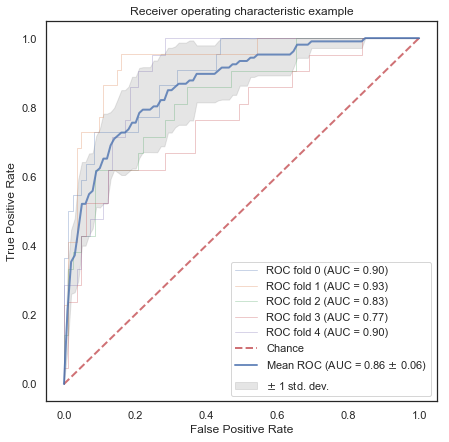

In [6]:
roc_kfold(clf=clf, X=vlbw_norm, y=labels, k=5)

In [7]:
vlbw_splits = kfold_split(vlbw_norm, labels, 5, seed=18, shuffle=True)

Test supervised classifiers using `validator` function

In [8]:
validator(vlbw_splits, clf)


Split 0: 0.7766990291262136
[[71  2]
 [21  9]]

Split 1: 0.8737864077669902
[[83  0]
 [13  7]]

Split 2: 0.8252427184466019
[[77  4]
 [14  8]]

Split 3: 0.8529411764705882
[[83  0]
 [15  4]]

Split 4: 0.803921568627451
[[76 10]
 [10  6]]


In [9]:
# k-nearest neighbor classifier
neigh = KNeighborsClassifier(n_neighbors=3)

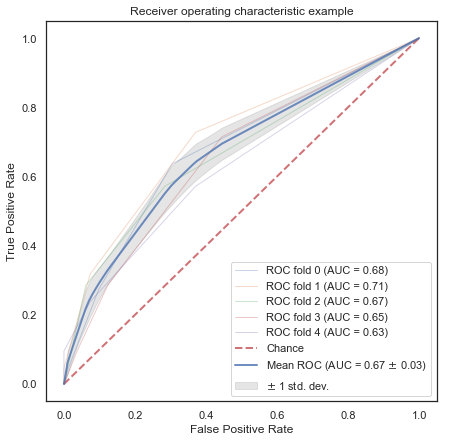

In [10]:
roc_kfold(clf=neigh, X=vlbw_norm, y=labels, k=5)

In [11]:
validator(vlbw_splits, neigh)


Split 0: 0.7669902912621359
[[72  1]
 [23  7]]

Split 1: 0.7475728155339806
[[73 10]
 [16  4]]

Split 2: 0.8155339805825242
[[78  3]
 [16  6]]

Split 3: 0.8529411764705882
[[80  3]
 [12  7]]

Split 4: 0.7450980392156863
[[69 17]
 [ 9  7]]


In [12]:
# random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

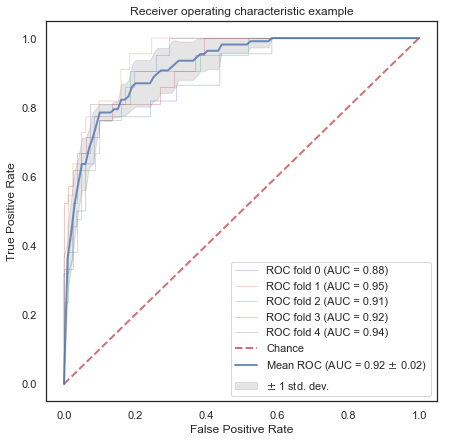

In [13]:
roc_kfold(clf=rf, X=vlbw_norm, y=labels, k=5)

In [14]:
validator(vlbw_splits, rf)


Split 0: 0.8252427184466019
[[70  3]
 [15 15]]

Split 1: 0.883495145631068
[[76  7]
 [ 5 15]]

Split 2: 0.9029126213592233
[[77  4]
 [ 6 16]]

Split 3: 0.9411764705882353
[[83  0]
 [ 6 13]]

Split 4: 0.8823529411764706
[[78  8]
 [ 4 12]]


In [17]:
# Nu-Support Vector Classifier
svc = SVC(gamma='auto', probability=True)

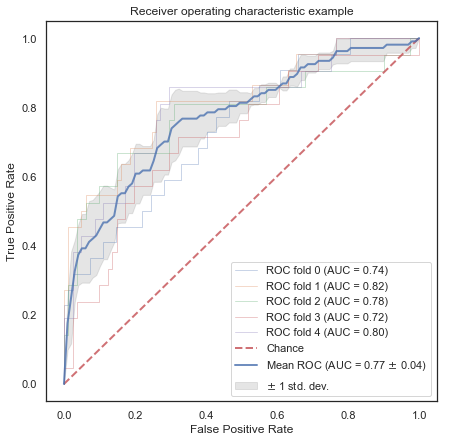

In [18]:
roc_kfold(clf=svc, X=vlbw_norm, y=labels, k=5)

In [19]:
validator(vlbw_splits, svc)


Split 0: 0.7087378640776699
[[73  0]
 [30  0]]

Split 1: 0.8058252427184466
[[83  0]
 [20  0]]

Split 2: 0.7864077669902912
[[81  0]
 [22  0]]

Split 3: 0.8137254901960784
[[83  0]
 [19  0]]

Split 4: 0.8431372549019608
[[86  0]
 [16  0]]


In [20]:
# Naive Bayes Gaussian
gnb = GaussianNB()

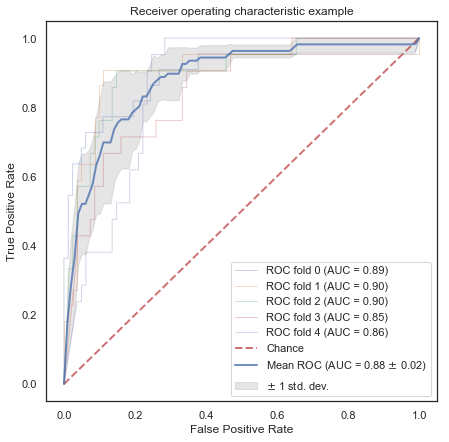

In [21]:
roc_kfold(clf=gnb, X=vlbw_norm, y=labels, k=5)

In [22]:
validator(vlbw_splits, gnb)


Split 0: 0.8737864077669902
[[68  5]
 [ 8 22]]

Split 1: 0.8252427184466019
[[71 12]
 [ 6 14]]

Split 2: 0.7669902912621359
[[62 19]
 [ 5 17]]

Split 3: 0.8627450980392157
[[71 12]
 [ 2 17]]

Split 4: 0.7941176470588235
[[72 14]
 [ 7  9]]


In [24]:
# Naive Bayes Gaussian
gbc = GradientBoostingClassifier()

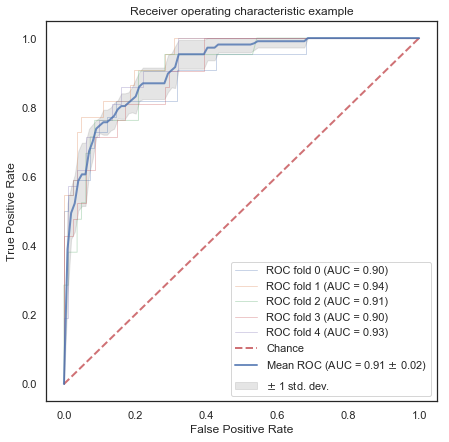

In [25]:
roc_kfold(clf=gbc, X=vlbw_norm, y=labels, k=5)

In [27]:
validator(vlbw_splits, gbc)


Split 0: 0.8058252427184466
[[70  3]
 [17 13]]

Split 1: 0.912621359223301
[[78  5]
 [ 4 16]]

Split 2: 0.912621359223301
[[78  3]
 [ 6 16]]

Split 3: 0.9019607843137255
[[82  1]
 [ 9 10]]

Split 4: 0.8529411764705882
[[77  9]
 [ 6 10]]


In [29]:
# Naive Bayes Gaussian
abc = AdaBoostClassifier()

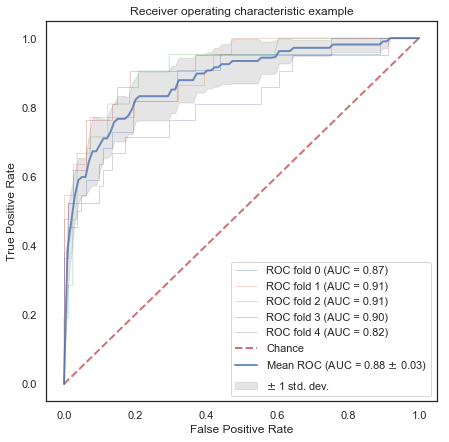

In [30]:
roc_kfold(clf=abc, X=vlbw_norm, y=labels, k=5)

In [31]:
validator(vlbw_splits, abc)


Split 0: 0.8252427184466019
[[70  3]
 [15 15]]

Split 1: 0.8640776699029126
[[75  8]
 [ 6 14]]

Split 2: 0.8932038834951457
[[76  5]
 [ 6 16]]

Split 3: 0.9019607843137255
[[82  1]
 [ 9 10]]

Split 4: 0.8627450980392157
[[79  7]
 [ 7  9]]
